In [2]:
%pip install q keras==2.2.4
%pip install tensorflow==2.12

     -------------------------------------- 312.5/312.5 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 152.8/152.8 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 19.1 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 272.8/272.8 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 430.5/430.5 kB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 26.0 MB/s eta 0:00:00
     ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [5]:
%pip install scikit-image

     --------------------------------------- 24.5/24.5 MB 23.3 MB/s eta 0:00:00
  Using cached imageio-2.31.5-py3-none-any.whl (313 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached tifffile-2023.9.26-py3-none-any.whl (222 kB)

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
%pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 19.9 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 KB ? eta 0:00:00
     ---------------------------------------- 103.1/103.1 KB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 12.4 MB/s eta 0:00:00
     ------------------------------------- 478.0/478.0 KB 15.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\Python310\\share'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [3]:
!nvidia-smi

Thu Oct 12 13:05:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8     5W /  N/A |    122MiB /  6144MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Preparar datos

In [88]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

[]

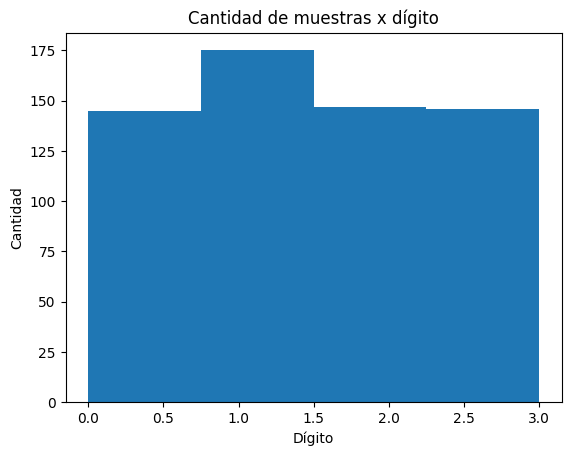

In [89]:
plt.figure()
plt.title("Cantidad de muestras x dígito")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y, bins=4)
plt.plot()

### Visualizando el `dataset`

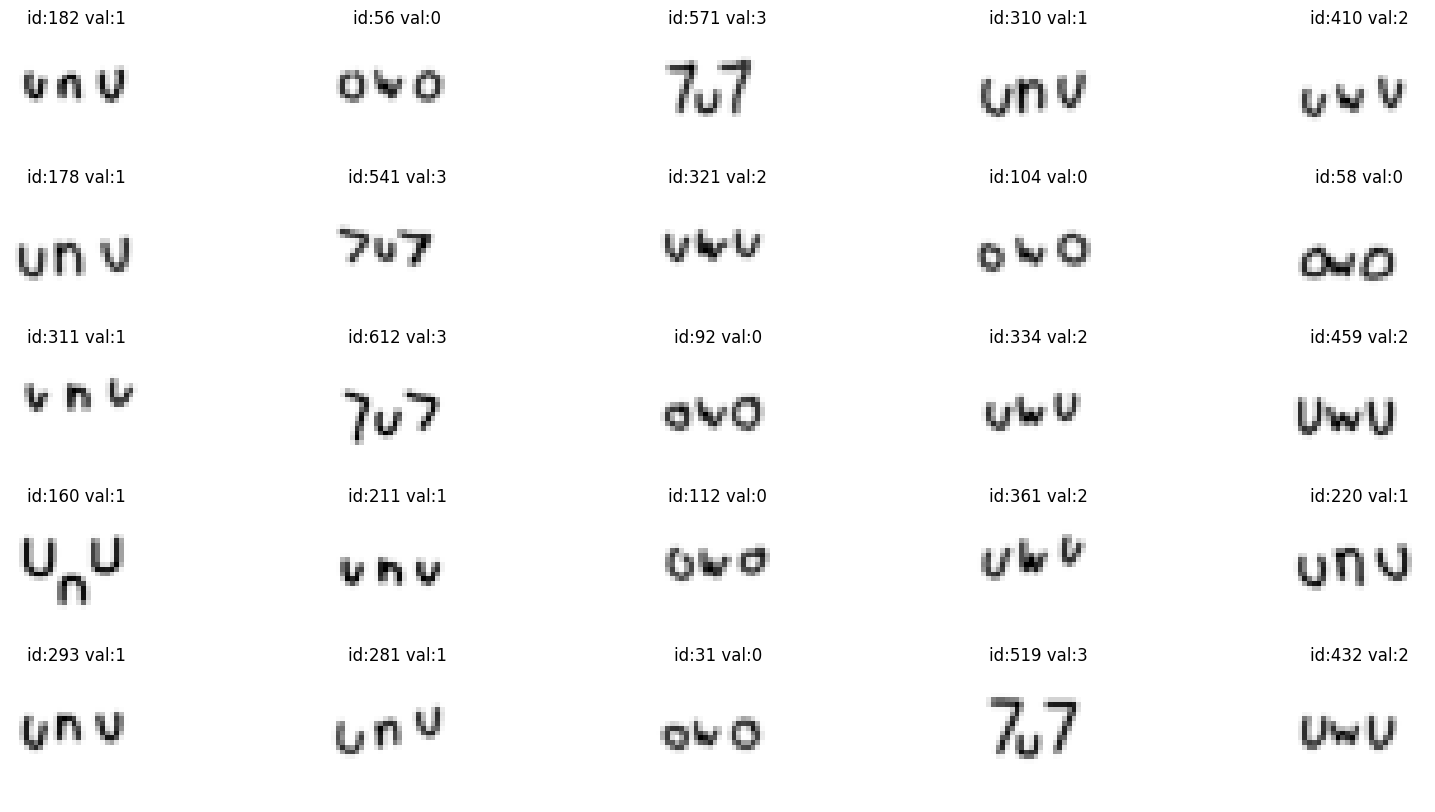

In [90]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

### Split de train-test

In [91]:
X.shape

(613, 28, 28)

In [92]:
y.shape

(613,)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

[]

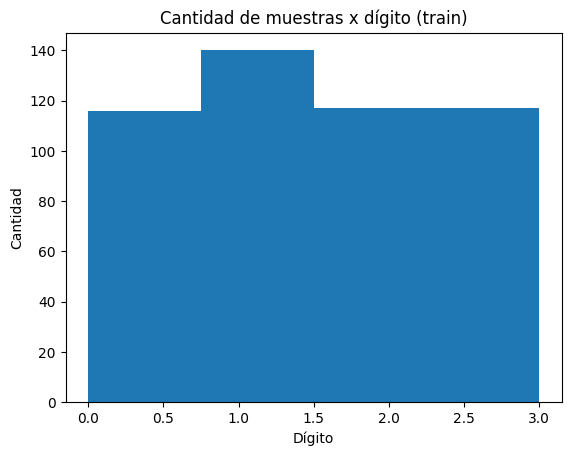

In [94]:
plt.figure()
plt.title("Cantidad de muestras x dígito (train)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_train, bins=4)
plt.plot()

[]

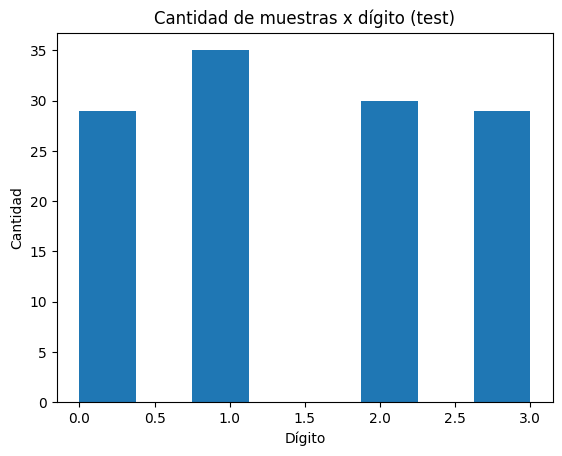

In [95]:
plt.figure()
plt.title("Cantidad de muestras x dígito (test)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_test, bins=8)
plt.plot()

In [96]:
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(490, 28, 28, 1) (123, 28, 28, 1)


## Definimos un modelo

In [97]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.python.keras.optimizers import gradient_descent_v2


bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='tanh', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='tanh', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='tanh', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(512, activation='tanh'), #modificar!
                    Dense(4, activation='softmax')]) #no modificar

optimizer1=gradient_descent_v2.SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1152)            

## Entrenamiento

In [98]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
31/31 [==============================] - 1s 22ms/step - loss: 1.3899 - accuracy: 0.2592 - val_loss: 1.3865 - val_accuracy: 0.3089
Epoch 2/500
31/31 [==============================] - 1s 17ms/step - loss: 1.3883 - accuracy: 0.2551 - val_loss: 1.3851 - val_accuracy: 0.3333
Epoch 3/500
31/31 [==============================] - 1s 16ms/step - loss: 1.3869 - accuracy: 0.2592 - val_loss: 1.3838 - val_accuracy: 0.3252
Epoch 4/500
31/31 [==============================] - 1s 16ms/step - loss: 1.3855 - accuracy: 0.2796 - val_loss: 1.3825 - val_accuracy: 0.3496
Epoch 5/500
31/31 [==============================] - 1s 16ms/step - loss: 1.3843 - accuracy: 0.2796 - val_loss: 1.3814 - val_accuracy: 0.3415
Epoch 6/500
31/31 [==============================] - 1s 16ms/step - loss: 1.3830 - accuracy: 0.3000 - val_loss: 1.3803 - val_accuracy: 0.3659
Epoch 7/500
31/31 [==============================] - 0s 16ms/step - loss: 1.3819 - accuracy: 0.3041 - val_loss: 1.3793 - val_accuracy: 0.3496
Epoch 

In [100]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.4350
Accuracy = 0.9350


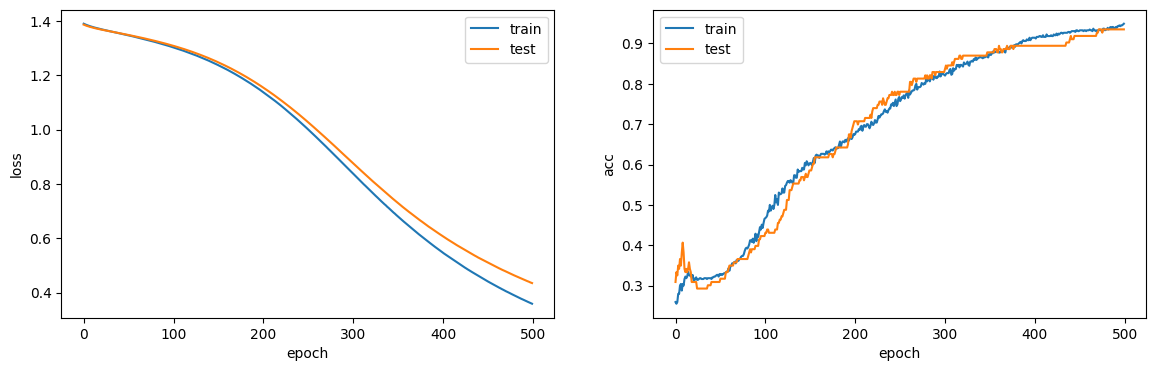

In [101]:
show_results(model, log)

## Probando el modelo

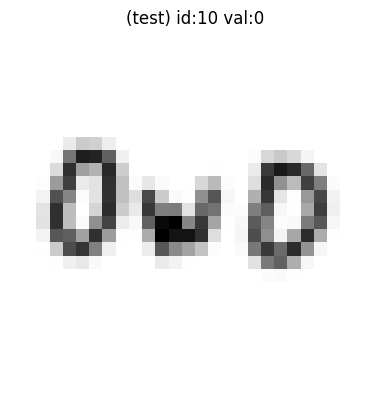

In [20]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

## Usando el modelo entrenado

In [21]:
salida = model.predict(im[None,:,:,:])[0]
salida

array([0.2889886 , 0.22076468, 0.2689455 , 0.22130123], dtype=float32)

[]

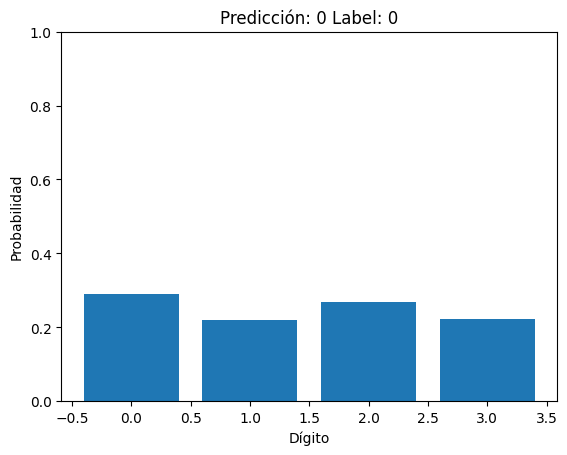

In [22]:
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), label ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(4), salida)
plt.plot()

Para guardar el modelo

In [27]:
model.save('modelo_entrenado.h5')